### Support Vector Classification

In [1]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# features (1 sim, 0 não)
# pelo longo? 
# perna curta?
# faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# 1 => porco, 0 => cachorro
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] #labels

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [2]:
# teste único
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [3]:
# teste multiplo
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]

model.predict(teste_x)

array([0, 1, 0])

In [4]:
# precisão
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto %.2f " % (taxa_acerto * 100))

Taxa de acerto 66.67 


In [5]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
x= dados[["home","how_it_works","contact"]]
y= dados[["bought"]]

treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

print(previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 75 elementos e testaremos com 24 elementos
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
A acurácia foi 95.83%


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
x= dados[["home","how_it_works","contact"]]
y= dados[["bought"]]

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify=y) #stratify para garantir proporção de labels
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

print(previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
[0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1]
A acurácia foi 96.00%


### Support Vector Classification - Duas dimensões

In [7]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

a_renomear = {'expected_hours' : 'horas_esperadas', 'price' : 'preco', 'unfinished' : 'nao_finalizado'}
dados = dados.rename(columns = a_renomear)

troca = {0 : 1, 1 : 0}
dados['finalizado'] = dados.nao_finalizado.map(troca)

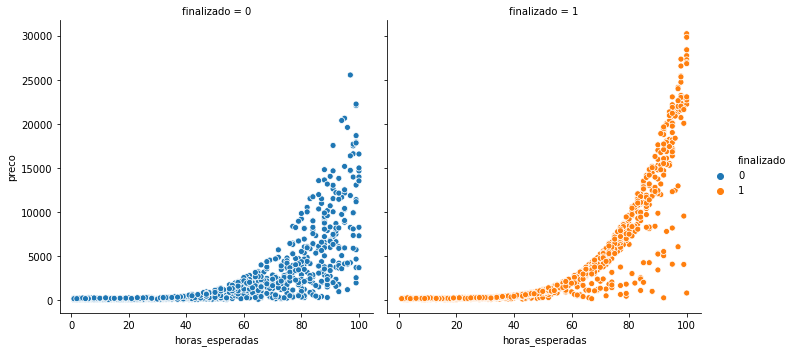

In [8]:
import seaborn as sns

#sns.scatterplot(x="horas_esperadas", y="preco", data=dados)
#sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

#print(previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.59%


In [10]:
import numpy as np
baseline = np.ones(540)
acuracia = accuracy_score(teste_y, baseline) * 100
print("A acurácia do Baseline foi %.2f%%" % acuracia)

A acurácia do Baseline foi 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

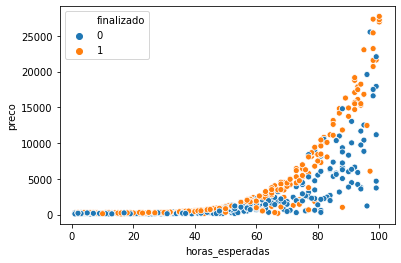

In [11]:
# curva de decisão
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x) 

In [12]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

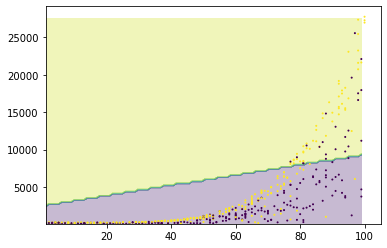

In [13]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

### Support Vector Classification - Não Linear

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


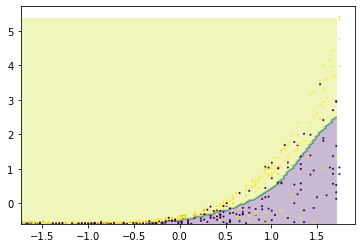

In [15]:
data_x = teste_x[:,0] # todas as linhas da coluna 0 do array teste_x
data_y = teste_x[:,1] # todas as linhas da coluna 1 do array teste_x

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


### Dummy Classifiers

In [16]:
import pandas as pd
from datetime import datetime

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

a_renomear = {'mileage_per_year' : 'milhas_por_ano', 'model_year' : 'ano_do_modelo', 'price' : 'preco', 'sold' :'vendido'}
dados = dados.rename(columns=a_renomear)
a_trocar = {'no': 0, 'yes': 1}
dados.vendido = dados.vendido.map(a_trocar)
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [17]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 49.26%


In [18]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 52.59%


In [19]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.59%


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 77.48%


### Decision Tree Classifier

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3) #max_depth
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


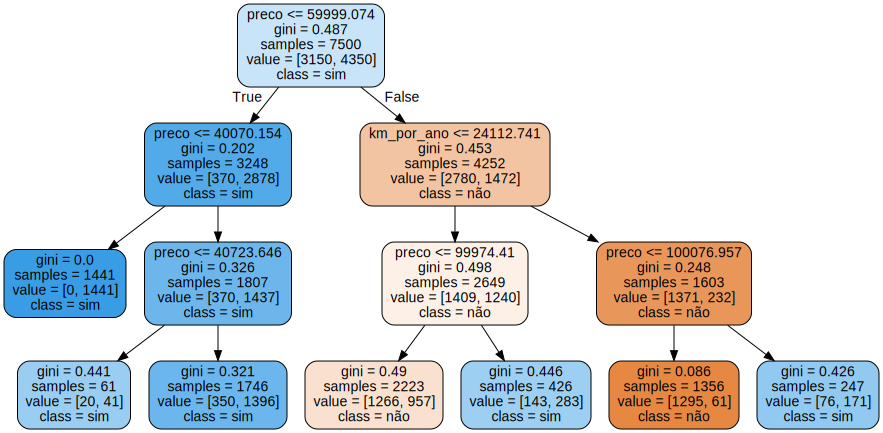

In [22]:
#!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled = True, rounded = True, feature_names = features, class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

### Muitas Dimensões

In [23]:
import pandas as pd

resultados_exames = pd.read_csv('exames.txt')
resultados_exames.head(3)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,...,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,103.78,1203.0,0.10960,0.15990,0.1974,...,152.5,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN


In [ ]:
resultados_exames.isnull().sum()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 1234
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id", "diagnostico", "exame_33"])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

Resultado da classificação 92.40%


In [26]:
#Dummy Classifier

from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" % (classificador_bobo.score(teste_x, teste_y)* 100))

Resultado da classificação boba 61.40%


<AxesSubplot:>

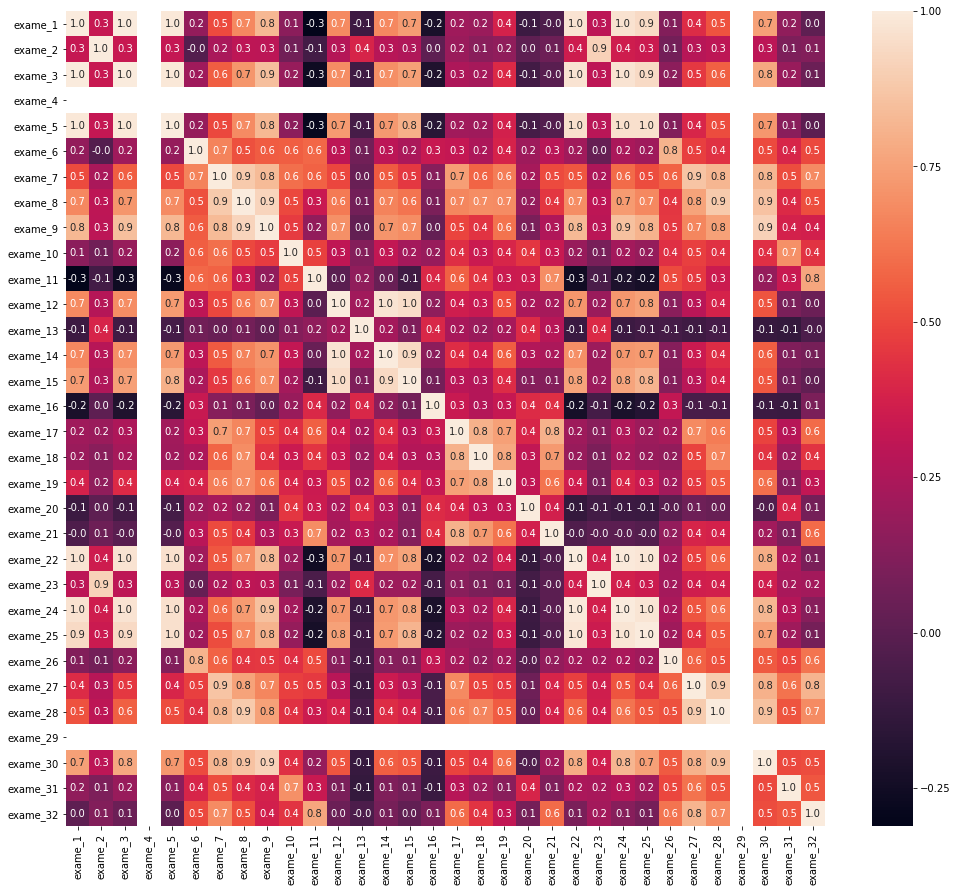

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_correlacao = valores_exames.corr()
plt.figure(figsize=(17, 15))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')